In [1]:
import logging
import math
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
from scipy.stats import rankdata
from sklearn.preprocessing import normalize
from math import log
from mpl_toolkits.axes_grid1 import make_axes_locatable   
import random
from mpl_toolkits.mplot3d import axes3d

from scipy.special import logit as logit


class Logger(object):
    def __init__(self, log_file_name, log_level, logger_name):
        self.__logger = logging.getLogger(logger_name)
        self.__logger.setLevel(log_level)
        file_handler = logging.FileHandler(log_file_name)
        console_handler = logging.StreamHandler()
        formatter = logging.Formatter(
            '[%(asctime)s] - [%(filename)s line:%(lineno)d] : %(message)s')
        file_handler.setFormatter(formatter)
        console_handler.setFormatter(formatter)
        self.__logger.addHandler(file_handler)
        self.__logger.addHandler(console_handler)

    def get_log(self):
        return self.__logger


def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom
    
    
logger = Logger('C:\\Users\\bird\\Desktop\\cancer_project_github\\log.txt', log_level=logging.DEBUG, logger_name="CIFAR").get_log()

clinical_231_file = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\clinical_231_data.csv'
mRNA_231_file = 'C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\data_mRNA_231_sort_with_sensitive.csv'




In [28]:

import textract
text = textract.process("C:\\Users\\bird\\Desktop\\Kinless hubs are potential target genes in prostate cancer network.pdf", method='pdftotext').decode("utf-8") 
text.replace('\n', ' ').replace('\r', '')
# text

"Genomics 112 (2020) 5227–5239  Contents lists available at ScienceDirect  Genomics journal homepage: www.elsevier.com/locate/ygeno  Kinless hubs are potential target genes in prostate cancer network a,b,c,d,1  Irengbam Rocky Mangangcha ⁎ R.K. Brojen Singhd,  d,1  , Md. Zubbair Malik  e  b,⁎  , Omer Kucuk , Shakir Ali  ,  T  a  School of Interdisciplinary Sciences and Technology, Jamia Hamdard, New Delhi 110062, India Bioinformatics Infrastructure Facility, BIF & Department of Biochemistry, School of Chemical and Life Sciences Jamia Hamdard, New Delhi 110062, India Department of Zoology, Deshbandhu College, University of Delhi, New Delhi 110019, India d School of Computational & Integrative Sciences, Jawaharlal Nehru University, New Delhi 110067, India e Winship Cancer Institute of Emory University, 1365 Clifton Road NE, Atlanta, GA 30322, USA b c  ARTICLE INFO  ABSTRACT  Keywords: Hubs Systems biology Key disease genes Prostate Cancer Network theory Centrality lethality rule  Complex 

In [2]:
"""
load data
"""
mRNA_231_df=pd.read_csv(mRNA_231_file)

st = [str(x) for x in range(231)]

mRNA_231_df.drop_duplicates(subset=st)

mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
print(mRNA_231_df)


                 0          1          2          3          4           5  \
Hugo_ID                                                                      
0        12880.736  39235.245  47125.027  17759.562  16911.939  373520.889   
1        13629.979  29296.085  42686.075  14363.479  12011.571  157101.452   
2            8.693     22.395     50.843     66.151     54.679   11564.212   
3         1926.368   9021.929  12278.160   8388.242  12418.195   74725.583   
4         8592.185  19165.452  13258.599   9400.131   9190.623  150989.122   
...            ...        ...        ...        ...        ...         ...   
14374        0.000      0.000      0.000      0.000      0.000       0.000   
14375        0.000      0.000      0.000      0.000      0.000       0.000   
14376        0.000      0.000      0.000      0.000      0.000       0.000   
14377        0.000      0.000      0.000      0.000      0.000       0.000   
14378        0.000      0.000      0.000      0.000      0.000  

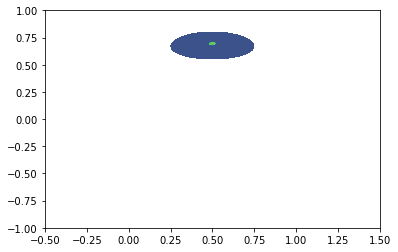

In [1]:
"""
test area
"""

import numpy as np
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt
from numpy.linalg import inv


x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-1, 1, 100)
xv, yv = np.meshgrid(x, y)

rand = np.random.RandomState(0)
A = np.triu(rand.rand(5, 5))*10
i = np.identity(5)


w = []
for i in x:
    b = []
    for v in y:
        a = complex(i,v)*i - A
        a = inv(a)
        fx = LA.norm(a, 2)
        r = math.log10(fx)
        b.append(r)
    w.append(b)



h = plt.contourf(xv,yv,w,levels=[1, 2, 3])
plt.show()

In [7]:
def correlation_of_top_n_mRNAs_and_m_patients(mRNA_num, patient_range):
    (p_start, p_end) = patient_range
    mRNA_231_df=pd.read_csv(mRNA_231_file)
    mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
    patient_mRNA = []
    for column in mRNA_231_df:
        #     print(mRNA_244_df[column].tolist())
        patient_mRNA.append(mRNA_231_df[column].tolist())
    # print(patient_mRNA[0])
    print(len(patient_mRNA))
    mRNA_np = np.asarray(patient_mRNA)
    # r = np.corrcoef(patient_np, patient_np)
    # r
    mRNA_np = mRNA_np[p_start: p_end, 0:mRNA_num].T
    print(mRNA_np.shape)
    # correlations = [ round(elem, 2) for elem in correlations ]
    # print(correlations)

    correlation_matrix = np.corrcoef(mRNA_np, mRNA_np)[0:mRNA_num,0:mRNA_num]
    print(correlation_matrix.shape)
    
    return correlation_matrix


def plot_general_distr(correlation_matrix,title):
    ''' 
    given a heatmap matrix or a list 'correlation_matrix' , pdf and cdf will be ploted with title 'title'
    '''
    n = 500
    if len(correlation_matrix.shape) == 2 and correlation_matrix.shape[0] == correlation_matrix.shape[1]:
        correlations = correlation_matrix[~np.eye(correlation_matrix.shape[0],dtype=bool)].reshape(correlation_matrix.shape[0],-1)
    else:
        n = 100
        correlations = np.copy(correlation_matrix)
    print(correlations.shape)               
    correlations = correlations.flatten()
#     correlations = [ round(elem, 3) for elem in correlations ]


    # print(len(correlations))
    # correlations = list(filter(lambda a: a <0.9999, correlations))
    # print(len(correlations))

    s = np.asarray(correlations)   # generate your data sample with N elements
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    y = f(x)/len(correlations)

    cdfy = np.cumsum(y)
    cdfy = np.concatenate(([0], cdfy))

    plt.figure(figsize=(10,5))
    plt.xlabel(title, fontsize=20)
    plt.ylabel('pdf', fontsize=20)
    plt.plot(x, y)
    plt.show()


    plt.figure(figsize=(10,5))
    plt.xlabel(title, fontsize=20)
    plt.ylabel('cdf', fontsize=20)
    plt.plot(np.concatenate(([0], x)), cdfy)
    plt.show()



def sort_within_each_cancer(correlation_matrix):
    corr_means = correlation_matrix.mean(axis=0)
    ranks = np.argsort(-corr_means)
    correlation_matrix = correlation_matrix[:, ranks][ranks]
    correlations = correlation_matrix[~np.eye(correlation_matrix.shape[0],dtype=bool)].reshape(correlation_matrix.shape[0],-1)
    corr_means = correlations.mean(axis=0)
    print(corr_means.shape)
    return correlation_matrix, corr_means


# def plot_heatmap(correlation_matrix):


#     f = plt.figure(figsize=(20,20))
    
#     plt.rc('xtick',labelsize=20)
#     plt.rc('ytick',labelsize=20)
    
#     ax = f.add_subplot(111)
#     ax.yaxis.tick_right()

#     img = plt.imshow(correlation_matrix, cmap='seismic',vmin=-1, vmax=1, interpolation='nearest') #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

#     ax = plt.subplot(111)
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="2%", pad=1)

#     plt.colorbar(img,cax=cax)
#     plt.show()
 
def norm_and_sort_patients(patient, params ):
    scheme, sort_standard,  norm, sort_s, norm_s= params
    patient_np = np.copy(patient)
    if norm == 'linear_scale_and_bin':
        patient_np = np.floor(scale(patient_np, 0, 100))
    if norm == 'log_scale_and_bin':
        patient_np = np.log10(patient_np+0.0000001)
        patient_np = np.floor(scale(patient_np, 0, 100))
    if norm == 'rank_and_scale': 
        x = patient_np.T
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        patient_np = scale(x.T,0,100)
        
      
    r = np.corrcoef(patient_np, patient_np)
    ranks = []
    
        
    if scheme == '':
        return r[0:231, 0:231], patient_np
    
    if scheme == 'homo':
#         print('homo')
#         corr_means = sort_standards(sort_standard, r[:231,:231])
#         print(corr_means.shape)
        correlation_matrix = r[0:117, 0:117] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = sort_standards(sort_standard, correlation_matrix)
#         print(corr_means)
        ranks = np.argsort(-corr_means)
        correlation_matrix = r[117:191, 117:191] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = sort_standards(sort_standard, correlation_matrix)
        ranks_t= np.argsort(-corr_means) + 117
        ranks = np.concatenate([ranks, ranks_t]) 
        correlation_matrix = r[191:231, 191:231] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = sort_standards(sort_standard, correlation_matrix)
        ranks_t = np.argsort(-corr_means) + 191
        ranks = np.concatenate([ranks, ranks_t]) 

    if scheme == 'hetero':
        correlation_matrix = r[ 0:231,0:117] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = sort_standards(sort_standard, correlation_matrix)
        ranks = np.argsort(-corr_means)
        correlation_matrix = r[0:231, 117:191] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = sort_standards(sort_standard, correlation_matrix)
        ranks_t= np.argsort(-corr_means) + 117
        ranks = np.concatenate([ranks, ranks_t]) 
        correlation_matrix = r[0:231, 191:231] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = sort_standards(sort_standard, correlation_matrix)
        ranks_t = np.argsort(-corr_means) + 191
        ranks = np.concatenate([ranks, ranks_t]) 

    correlation_matrix = r[0:231, 0:231]
    correlation_matrix = correlation_matrix[:, ranks][ranks]
    
#     correlation_matrix = np.around(correlation_matrix, decimals=2)
    
    return correlation_matrix, patient_np


def plot_heatmap(correlation_matrix, params):
#     r = np.corrcoef(patient_np, patient_np)

#     correlation_matrix = r[0:231, 0:231]
    # correlation_matrix = scale_floor(correlation_matrix, 0, 100) # normalisation method 1

#     print(correlation_matrix.mean(axis=0))
    scheme, sort_standad, norm, sorts, norms= params
    if not scheme in sorts:
        scheme = ''
    if not norm in norms:
        norm = ''
    ref_1 = norms.get(norm)
    ref_2 = sorts.get(scheme)
    if scheme: 
        scheme = '(Sort: '+scheme
        if norm:
            norm = ', Norm: ' + norm +')'
        else:
            norm = ', Norm: None)'
    else:
        scheme = '(Sort: None'
        if norm:
            norm = ', Norm: ' + norm +')'
        else:
            norm = ', Norm: None)'
        
    f = plt.figure(figsize=(20,20))
    
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)
    
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()

    # LN 117, Bone 74, Liver 40,Prostate 7,Lung 6
    plt.plot([117, 117], [0, 231], 'yellow')
    plt.plot([0, 244], [117, 117], 'yellow')
    plt.plot([191, 191], [0, 231], 'yellow')
    plt.plot([0, 244], [191, 191], 'yellow')
    plt.text(111, -1.5, 'LN-Bone', fontsize=28)
    plt.text(-6, 126, 'Bone-LN', rotation = 90, fontsize=28)
    plt.text(180, -1.5, 'Bone-Liver', fontsize=28)
    plt.text(-6,200, 'Liver-Bone', rotation = 90, fontsize=28)
    img = plt.imshow(correlation_matrix, cmap='seismic',vmin=-1, vmax=1, interpolation='nearest') #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
#     title = ref_1+'-'+ ref_2+' Heatmap ' + scheme + norm
#     plt.title(title, y=-0.07, fontsize=32)
#     ax = plt.subplot(111)
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="2%", pad=1)

#     plt.colorbar(img,cax=cax)
    plt.show()
   
    
    
    

def sort_standards(sort_std, corrs):
    if sort_std == 'mean':
        return np.mean(corrs, axis=0)
    elif sort_std == 'median':
        corrs = np.median(corrs, axis=0)
        return corrs
    elif sort_std == 'max':
        twmp = np.copy(corrs)
        twmp[twmp>0.999]=0
        return twmp.max(axis=0)
    elif sort_std == 'min':
        return corrs.min(axis=0)
    elif sort_std == 'weight':
        twmp = np.copy(corrs)
        twmp[twmp>0.999]=0
        twmp = list(twmp.max(axis=0))
        mini1 = list(corrs.min(axis=0))
        mean1 = list(np.mean(corrs, axis=0))
        median1 = list(np.median(corrs, axis=0))
        vrs = np.array([twmp, mini1, mean1, median1])
        vrs = np.var(vrs, axis=0)
        return vrs
    else:
        return corrs.mean(axis=0)
    


In [5]:

# correlation_matrix = correlation_of_top_n_mRNAs_and_m_patients(10000,(0,231))
# correlation_matrix,corr_means = sort_within_each_cancer(correlation_matrix)
# plot_general_distr(correlation_matrix, 'correlation')  # correlation distribution of correlation matrix
# plot_general_distr(corr_means, 'correlation')          # correlation distribution of mean value
# plot_heatmap(correlation_matrix)



In [36]:
X = np.array([[0.5,0.0001,0.9999999],[0.1,0.4,0.8]])
Y = [  6,   1,   2,   3,   4,   5]

logit(X)

array([[ 0.        , -9.21024037, 16.11809555],
       [-2.19722458, -0.40546511,  1.38629436]])

In [42]:
"""
given mask, threshold, norm scheme,
returns np.array(mask_corr) correlations of all genes with the mask, 
        np.array(good_mRNA) selected mRNAs shape: (n*231), 
        the_corr correlations of selected mRNAs with the mask
"""
def correlation_with_mask(mask, threshold, norm):
    (p_start, p_end) = (0,231)
    mRNA_231_df=pd.read_csv(mRNA_231_file)
    mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
    patient_mRNA = []
    for column in mRNA_231_df:
        #     print(mRNA_244_df[column].tolist())
        patient_mRNA.append(mRNA_231_df[column].tolist())
    mRNA_np = np.asarray(patient_mRNA)
    
    if norm == 'linear_scale_and_bin':
        mRNA_np = np.floor(scale(mRNA_np, 0, 100))
        
    if norm == 'log_scale_and_bin':
        mRNA_np = np.log10(mRNA_np+0.0000001)
        mRNA_np = np.floor(scale(mRNA_np, 0, 100))
        
    if norm == 'rank_and_scale': 
        x = mRNA_np.T
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        mRNA_np = scale(x.T,0,100)
    
    if norm == 'logit_origin': #logit-normalisation on the original binned values 
        mRNA_np =scale(np.floor(scale(mRNA_np, 0, 100)), 0.00000001,0.999999999) 
        mRNA_np = logit(mRNA_np)
        
    if norm == 'logit_log': #logit-normalisation on the log binned values 
        mRNA_np = np.log10(mRNA_np+0.0000001)
        mRNA_np =scale(np.floor(scale(mRNA_np, 0, 100)), 0.00000001,0.999999999) 
        mRNA_np = logit(mRNA_np)
        
        
        
    mRNA_np = mRNA_np.T
    
    mask_corr = []  # correlations of all genes with the mask
    good_mRNA = []  # selected mRNAs shape: (n*231)
    the_corr = []   # correlations of selected mRNAs with the mask
    mRNA_index = []
    
    for i in range(len(mRNA_np)):
        each = mRNA_np[i]
        corr = np.corrcoef(mask, each)[1,0]
        if corr > threshold or corr<-threshold:
#             print(i, corr)
            good_mRNA.append(each)
            mRNA_index.append(i)
            the_corr.append(corr)
        mask_corr.append(corr)
    return np.array(mask_corr), mRNA_index, np.array(good_mRNA), the_corr

def plot_diff_threshold(norm, thresholds):
    '''
    X: threshold from 0.05 to 0.45 with step 0.05. Y: the number of genes selected for the three cancers in different colours.
    return a detailed table
    '''
    LN_m = [1]*117+(231-117)*[0]
    Bone_m = [0]*117+74*[1]+(40)*[0]
    Liver_m = [0]*191+(40)*[1]
    
    LN_gene_pos_num = []
    Bone_gene_pos_num = []
    Liver_gene_pos_num = []
    
    LN_gene_neg_num = []
    Bone_gene_neg_num = []
    Liver_gene_neg_num = []
    
    for i in thresholds:
        print(i)
        correlations, _, Bonegood_mRNA, the_corr = correlation_with_mask(LN_m, i,norm)
        LN_gene_pos_num.append(len(list(filter(lambda x: (x > 0), the_corr))) )
        LN_gene_neg_num.append(len(list(filter(lambda x: (x < 0), the_corr))) )
        
        correlations, _,Bonegood_mRNA, the_corr = correlation_with_mask(Bone_m, i,norm)
        Bone_gene_pos_num.append(len(list(filter(lambda x: (x > 0), the_corr))))
        Bone_gene_neg_num.append(len(list(filter(lambda x: (x < 0), the_corr))))
        
        correlations, _,Bonegood_mRNA, the_corr = correlation_with_mask(Liver_m, i,norm)
        Liver_gene_pos_num.append(len(list(filter(lambda x: (x > 0), the_corr))))
        Liver_gene_neg_num.append(len(list(filter(lambda x: (x < 0), the_corr))))
        
    LN_gene_neg_num = [ -x for x in LN_gene_neg_num]
    Bone_gene_neg_num = [ -x for x in Bone_gene_neg_num]
    Liver_gene_neg_num = [ -x for x in Liver_gene_neg_num]
    
    threshold_select_num_df = pd.DataFrame({
                                            "LN": [sum(x) for x in zip(LN_gene_pos_num, [ -i for i in LN_gene_neg_num])],
                                            "LN p": LN_gene_pos_num,
                                            "LN n": [ -i for i in LN_gene_neg_num ], 
                                            "Bone": [sum(x) for x in zip(Bone_gene_pos_num, [-i for i in Bone_gene_neg_num])],
                                            "Bone p": Bone_gene_pos_num, 
                                            "Bone n": [ -i for i in Bone_gene_neg_num ] ,  
                                            "Liver": [sum(x) for x in zip(Liver_gene_pos_num, [-i for i in Liver_gene_neg_num])],
                                            "Liver p":Liver_gene_pos_num,   
                                            "Liver n": [-i for i in Liver_gene_neg_num]})
    
    
    plt.figure(figsize=(15,12))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)


    plt.plot(thresholds, LN_gene_pos_num, color='blue', label='with LN mask (positive)')

    plt.plot(thresholds,Bone_gene_pos_num, color='orange', label='with Bone mask (positive)')
    plt.plot(thresholds,Liver_gene_pos_num, color='green', label='with Liver mask (positive)')

    plt.plot(thresholds, LN_gene_neg_num, '--',color='blue', label='with LN mask (negative)')
    plt.plot(thresholds,Bone_gene_neg_num, '--',color='orange', label='with Bone mask (negative)')
    plt.plot(thresholds,Liver_gene_neg_num, '--',color='green', label='with Liver mask (negative)')


    plt.scatter(thresholds, LN_gene_pos_num, color='blue', s=30)
    plt.scatter(thresholds,Bone_gene_pos_num, color='orange', s=30)
    plt.scatter(thresholds,Liver_gene_pos_num, color='green', s=30)

    plt.scatter(thresholds, LN_gene_neg_num, color='blue', s=30)
    plt.scatter(thresholds,Bone_gene_neg_num,color='orange', s=30)
    plt.scatter(thresholds,Liver_gene_neg_num, color='green', s=30)

    plt.legend(loc='upper right', markerscale=5, fontsize=18, framealpha=0.5)
    plt.ylabel('negative threshold     number of genes     positive threshold', fontsize=20)
    plt.xlabel('correlation threshold (absolute value)', fontsize=20)


    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()
    return threshold_select_num_df

def gene_selected_by_diff_threshold(norm,thresholds,remove_intersect= True):
    '''
    returns union_genes, intersect_genes
    '''
    LN_m = [1]*117+(231-117)*[0]
    Bone_m = [0]*117+74*[1]+(40)*[0]
    Liver_m = [0]*191+(40)*[1]
    
    LN_genes = []
    Bone_genes= []
    Liver_genes= []
    union_genes = [] # union, 3d np array (a,b,231), a is length of thresholds list, b is number of union selected genes in each threshold.
    intersect_genes = [] # intersect, 4d np array (a, 3, b, 231), a is length of thresholds list, 3 is 3 cancers intersect.
                            #b is number of union selected genes in each threshold.
    intersect_gene_ind =[]
    union_gene_ind = [] 
    genes_remove_intersect = []
    
    for i in thresholds:
#         print(i)
        correlations, LNgood_ind, LNgood_mRNA, the_corr = correlation_with_mask(LN_m, i,norm)
        LN_genes.append(LNgood_mRNA)
        
        correlations,Bonegood_ind, Bonegood_mRNA, the_corr = correlation_with_mask(Bone_m, i,norm)
        Bone_genes.append(Bonegood_mRNA)
        
        correlations,Livergood_ind, Livergood_mRNA, the_corr = correlation_with_mask(Liver_m, i,norm)
        Liver_genes.append(Livergood_mRNA)
        
        LNset = set([tuple(x) for x in LNgood_mRNA])
        Boneset = set([tuple(x) for x in Bonegood_mRNA])
        Liverset = set([tuple(x) for x in Livergood_mRNA])
        LN_Bone_intersect = np.array([x for x in LNset & Boneset])
        Liver_Bone_intersect = np.array([x for x in Boneset & Liverset])
        LN_Liver_intersect = np.array([x for x in Liverset & LNset])
        all_intersect = np.array([x for x in Liverset & LNset & Boneset])
        intersect_genes.append([LN_Bone_intersect, Liver_Bone_intersect, LN_Liver_intersect,all_intersect])
            
#         LNindset = set([tuple(x) for x in LNgood_ind])
#         Boneindset = set([tuple(x) for x in Bonegood_ind])
#         Liverindset = set([tuple(x) for x in Livergood_ind])
        all_ind_intersect = list(set(LNgood_ind) & set(Bonegood_ind) & set(Livergood_ind))
        intersect_gene_ind.append(all_ind_intersect)
        
        union_gene_ind.append(list(set().union(LNgood_ind,Bonegood_ind,Livergood_ind)))
        
        allgood_mRNA = np.concatenate((LNgood_mRNA,Bonegood_mRNA,Livergood_mRNA), axis=0) 
        allgood_mRNA = np.unique(allgood_mRNA, axis=0)
        if remove_intersect:    #still working on it
#             print(allgood_mRNA.shape, LN_Bone_intersect.shape, Liver_Bone_intersect.shape,  LN_Liver_intersect.shape)
            genes_remove_intersect.append(np.array([x for x in set([tuple(y) for y in allgood_mRNA]) if x not in Liverset and LNset and Boneset]))
            print(len(genes_remove_intersect[-1]))
        union_genes.append(allgood_mRNA)
#         print(allgood_mRNA.shape)
    return np.array(union_genes), np.array(intersect_genes), union_gene_ind



def table_of_selected_intersect(intersect_genes):
    """
    print the table shows intersect number of genes under masks, column 1-4: LN ∩ Bone
    Bone ∩ Liver, Liver ∩ LN , LN ∩ Liver ∩ LN 
    """
    intersect_num_list = []
    for each in intersect_genes:
        temp = []
        for a in each:
            temp.append(len(a))
        intersect_num_list.append(temp)
    res_table = pd.DataFrame(intersect_num_list)
    return res_table

In [41]:
a = [1,2,3,4,5,5]
b = [4,5,3,7,8]
c = [7,8,9]
list(set().union(a,b,c))

[1, 2, 3, 4, 5, 7, 8, 9]

(7444, 231) (2285, 231) (1391, 231) (1997, 231)
3237
(4803, 231) (1151, 231) (605, 231) (955, 231)
2324
(2,)


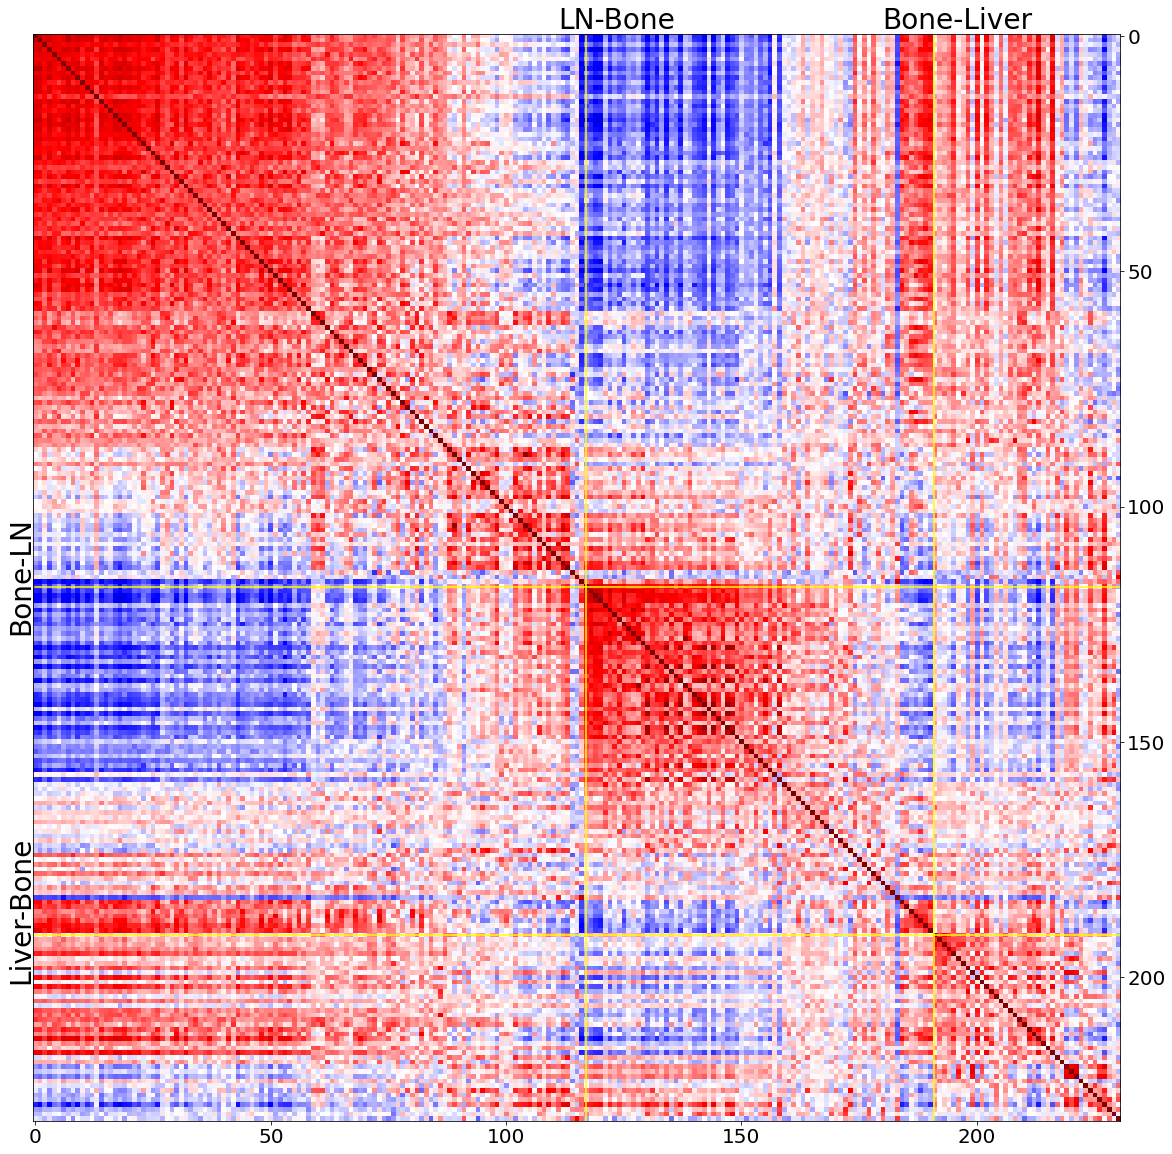

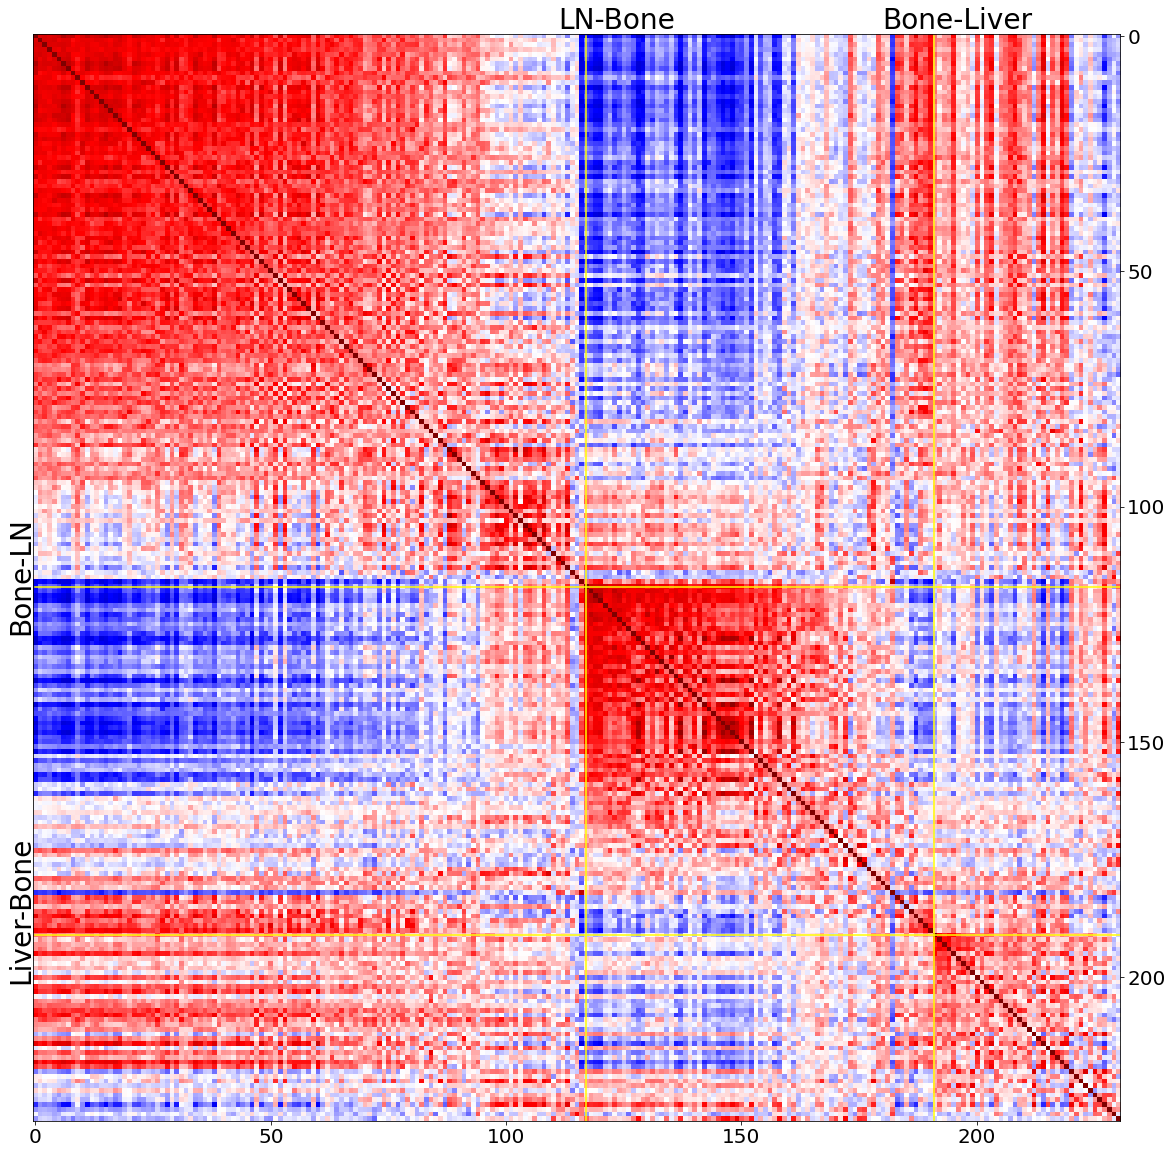

In [5]:
"""
In Table 3-1 and 3-2 for threshold 0.2 (and 0.15, respectively), 
•	the genes in LN but not in Bone
•	the genes in Bone but not in LN
•	for genes in both LN and Bone, we need to find those that give opposite correlations to LN and Bone filter vectors.  

"""

# def plot_heatmap(correlation_matrix, params):
# #     r = np.corrcoef(patient_np, patient_np)

# #     correlation_matrix = r[0:231, 0:231]
#     # correlation_matrix = scale_floor(correlation_matrix, 0, 100) # normalisation method 1

# #     print(correlation_matrix.mean(axis=0))
#     scheme, sort_standad, norm, sorts, norms= params
#     if not scheme in sorts:
#         scheme = ''
#     if not norm in norms:
#         norm = ''
#     ref_1 = norms.get(norm)
#     ref_2 = sorts.get(scheme)
#     if scheme: 
#         scheme = '(Sort: '+scheme
#         if norm:
#             norm = ', Norm: ' + norm +')'
#         else:
#             norm = ', Norm: None)'
#     else:
#         scheme = '(Sort: None'
#         if norm:
#             norm = ', Norm: ' + norm +')'
#         else:
#             norm = ', Norm: None)'
        
#     f = plt.figure(figsize=(20,20))
    
#     plt.rc('xtick',labelsize=20)
#     plt.rc('ytick',labelsize=20)
    
#     ax = f.add_subplot(111)
#     ax.yaxis.tick_right()

#     # LN 117, Bone 74, Liver 40,Prostate 7,Lung 6
#     plt.plot([117, 117], [0, 231], 'yellow')
#     plt.plot([0, 244], [117, 117], 'yellow')
# #     plt.plot([191, 191], [0, 231], 'yellow')
# #     plt.plot([0, 244], [191, 191], 'yellow')
#     plt.text(111, -1.5, 'LN-Bone', fontsize=20)
#     plt.text(-6, 126, 'Bone-LN', rotation = 90, fontsize=20)
# #     plt.text(180, -1.5, 'Bone-Liver', fontsize=20)
# #     plt.text(-6,200, 'Liver-Bone', rotation = 90, fontsize=20)
#     img = plt.imshow(correlation_matrix[:191,:191], cmap='seismic',vmin=-1, vmax=1, interpolation='nearest') #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# #     title = ref_1+'-'+ ref_2+' Heatmap ' + scheme + norm
# #     plt.title(title, y=-0.07, fontsize=32)
# #     ax = plt.subplot(111)
# #     divider = make_axes_locatable(ax)
# #     cax = divider.append_axes("right", size="2%", pad=1)

# #     plt.colorbar(img,cax=cax)
#     plt.show()
    
    
norm = "rank_and_scale" # linear_scale_and_bin, log_scale_and_bin, rank_and_scale, logit_origin, logit_log
LN_m = [1]*117+(231-117)*[0]
Bone_m = [0]*117+74*[1]+(40)*[0]
Liver_m = [0]*191+(40)*[1]



thre = 0.15 #0.15,0.2
thresholds = [0.15,0.2]
correlations, _,LNgood_mRNA, LN_corr = correlation_with_mask(LN_m, thre,norm)
correlations, _,Bonegood_mRNA, Bone_corr = correlation_with_mask(Bone_m, thre,norm)

LNset = set([tuple(x) for x in LNgood_mRNA])
Boneset = set([tuple(x) for x in Bonegood_mRNA])
LN_not_Bone = np.array([[x for x in LNset-Boneset]])  # LN_not_Bone
# LN_not_Bone = np.array([[x for x in Boneset-LNset]])  # Bone_not_LN


union_genes,intersect_genes, difference_genes= gene_selected_by_diff_threshold(norm, thresholds, remove_intersect=True)
LN_not_Bone = []
for i in range(len(intersect_genes)):
    temp = intersect_genes[i,0]
    ggs = []
    for each in temp:
        LNcorr = np.corrcoef(LN_m, each)[1,0]
        Bonecorr = np.corrcoef(Bone_m, each)[1,0]
        if LNcorr*Bonecorr<0 and abs(LNcorr) >= thresholds[i] and abs(Bonecorr) >= thresholds[i] :
            ggs.append(each)
    LN_not_Bone.append(np.array(ggs))  # the genes in both LN and Bone, but opposite
        


plot_gene_LNBone = np.array(LN_not_Bone)
# for i in range(len(plot_genes)):
#     print("num of genes selected")
#     print(np.array(plot_genes)[i].shape[0])
# res_table = table_of_selected_intersect(intersect_genes)

# print("table_of_selected_intersect")
# print(res_table)

sorts = {"":'0',
    "homo":'1',
    "hetero":"2"}

norms = {'': '0',
         'linear_scale_and_bin': 'A',
         'log_scale_and_bin': 'A',
         'rank_and_scale': 'B'
}

params = ['homo','mean', '', sorts, norms] # scheme = {'', 'hetero' 'homo'}, norm = {'','rank_and_scale', 'scale_and_bin_linear', 'log_scale_and_bin'}

print(plot_gene_LNBone.shape)
for i in range(len(plot_gene_LNBone)):
    patient_np = plot_gene_LNBone[i].T
#     patient_np = plot_gene_LNBone[i,3].T   # uncomment this for intersect_genes only

    correlation_matrix, patient_np = norm_and_sort_patients(patient_np, params)#hetero homo scale_and_bin rank_and_scale


    plot_heatmap(correlation_matrix,params)


(559, 231)
(195, 231)
(2154, 231)
(1089, 231)


(2154, 231)
(1089, 231)
(7444, 231) (2285, 231) (1391, 231) (1997, 231)
3237
(4803, 231) (1151, 231) (605, 231) (955, 231)
2324
(2, 4)
(559, 231)
(195, 231)
(2,)
(2154, 231)
(1089, 231)
(559, 231)
(195, 231)
(2285, 231)
(1151, 231)
(2,)
(2,)
(2,)


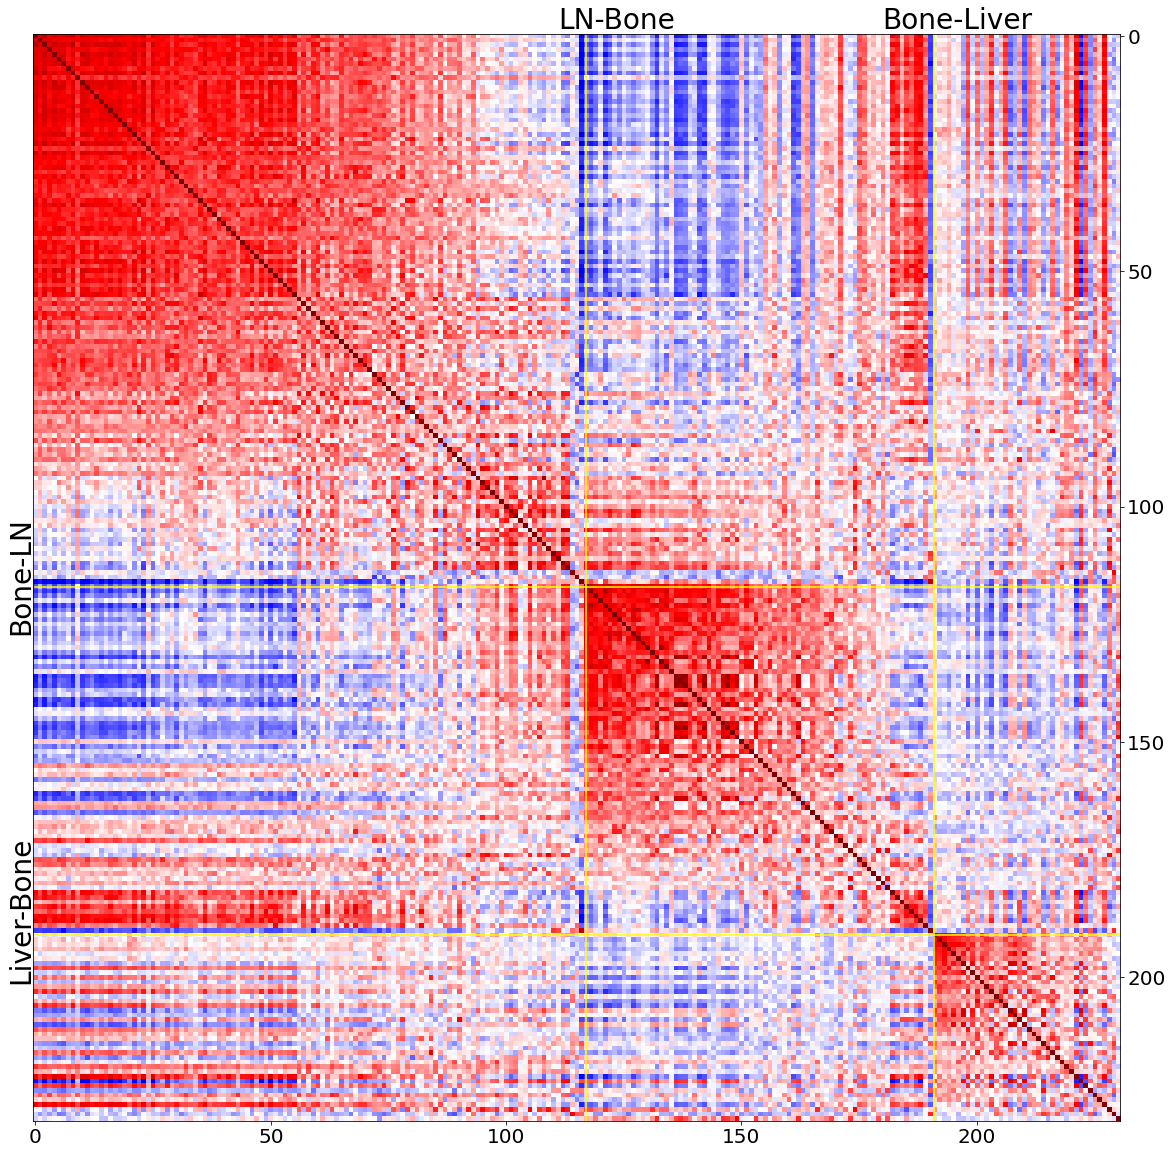

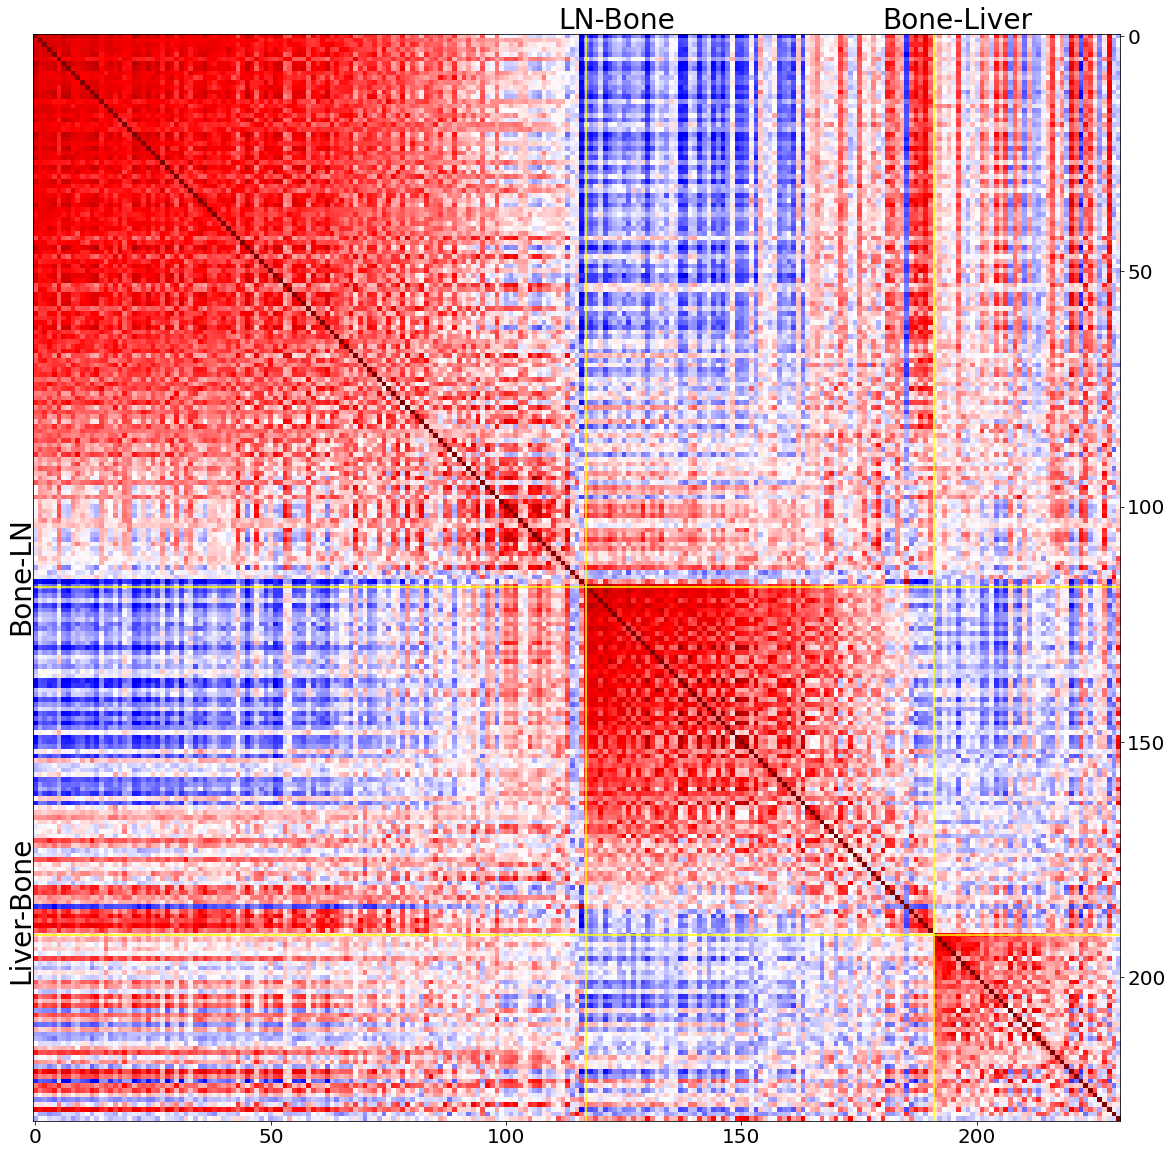

In [10]:
"""
this section plot heatmap for: genes in all three cancers and in both LN and Bone, but opposite
Have to run above, select 'in both LN and Bone, but opposite' to run.
"""
temp_genes = np.copy(plot_gene_LNBone)
print(temp_genes[0].shape)
print(temp_genes[1].shape)

union_genes,intersect_genes, difference_genes= gene_selected_by_diff_threshold(norm, thresholds, remove_intersect=True)

plot_genes = intersect_genes
temp2_genes = np.copy(plot_genes)

print(temp2_genes.shape)
print(temp2_genes[0,3].shape)
print(temp2_genes[1,3].shape)
print(temp_genes.shape)
print(temp_genes[0].shape)
print(temp_genes[1].shape)

a = temp2_genes[0,3]
b =  temp2_genes[1,3]
print(a.shape)
print(b.shape)
rres1 =  np.concatenate((a, temp_genes[0]), axis=0)
rres1 = np.unique(rres1, axis=0)
rres2 = np.concatenate((b, temp_genes[1]), axis=0)
rres2 = np.unique(rres2, axis=0)
print(rres1.shape)
print(rres2.shape)
rres = np.array([rres1,rres2])
print(rres.shape)


plot_genes = rres
print(np.array(plot_genes).shape)


sorts = {"":'0',
    "homo":'1',
    "hetero":"2"}

norms = {'': '0',
         'linear_scale_and_bin': 'A',
         'log_scale_and_bin': 'A',
         'rank_and_scale': 'B'
}

params = ['homo','mean', '', sorts, norms] # scheme = {'', 'hetero' 'homo'}, norm = {'','rank_and_scale', 'scale_and_bin_linear', 'log_scale_and_bin'}

print(plot_genes.shape)
for i in range(len(plot_genes)):
    patient_np = plot_genes[i].T
#     patient_np = plot_genes[i,3].T   # uncomment this for intersect_genes only

    correlation_matrix, patient_np = norm_and_sort_patients(patient_np, params)#hetero homo scale_and_bin rank_and_scale


    plot_heatmap(correlation_matrix,params)

    

(559, 231)
(2154, 231)
(2285, 231)
(195, 231)
(1089, 231)
(1151, 231)
428
(1857, 231)
133
(1018, 231)
(2,)


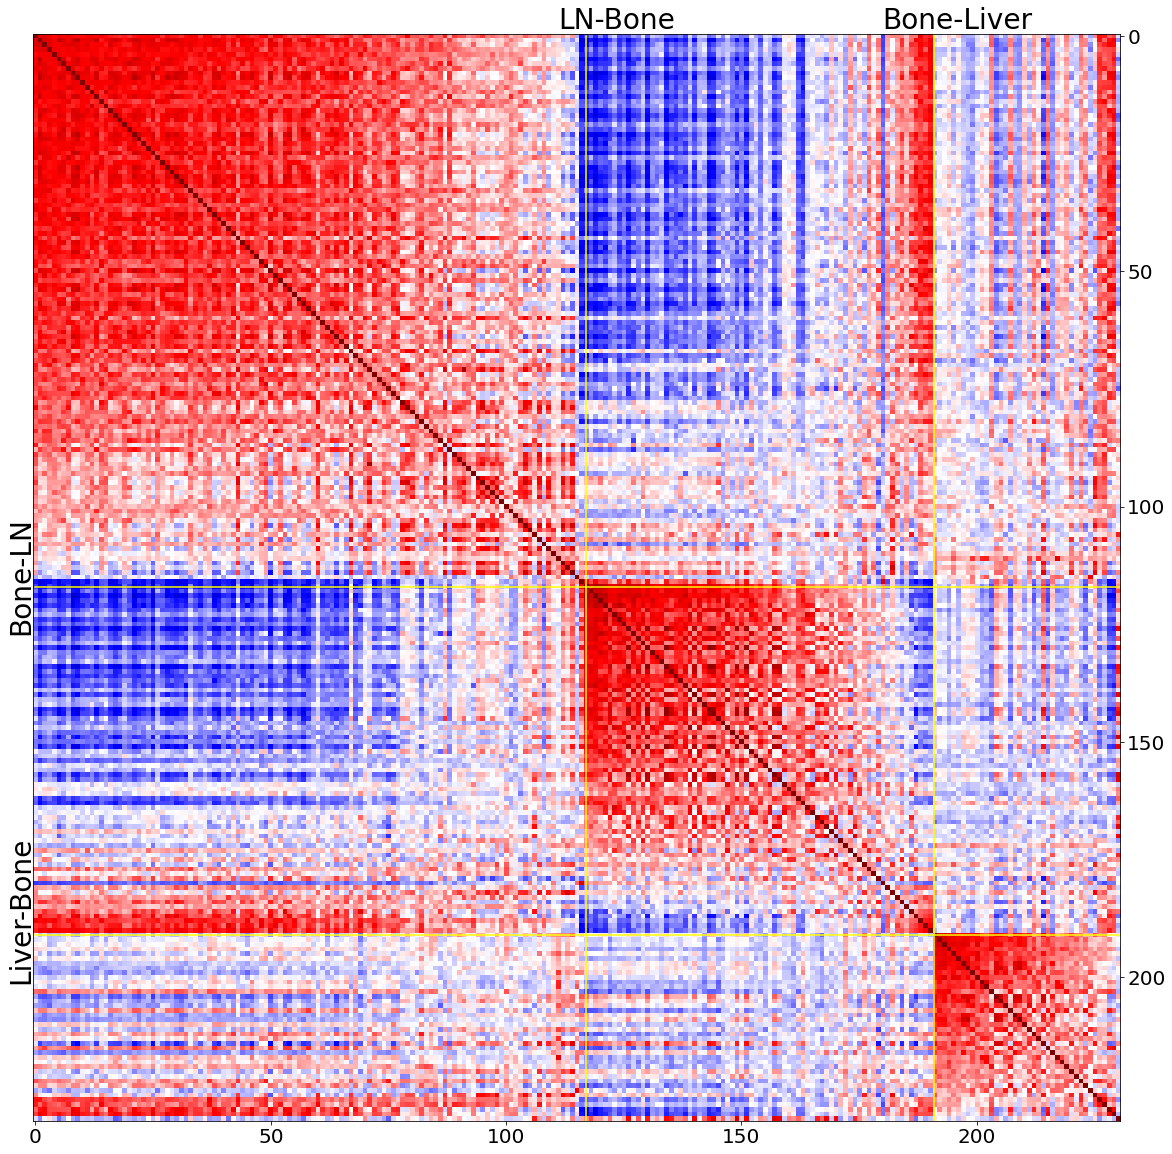

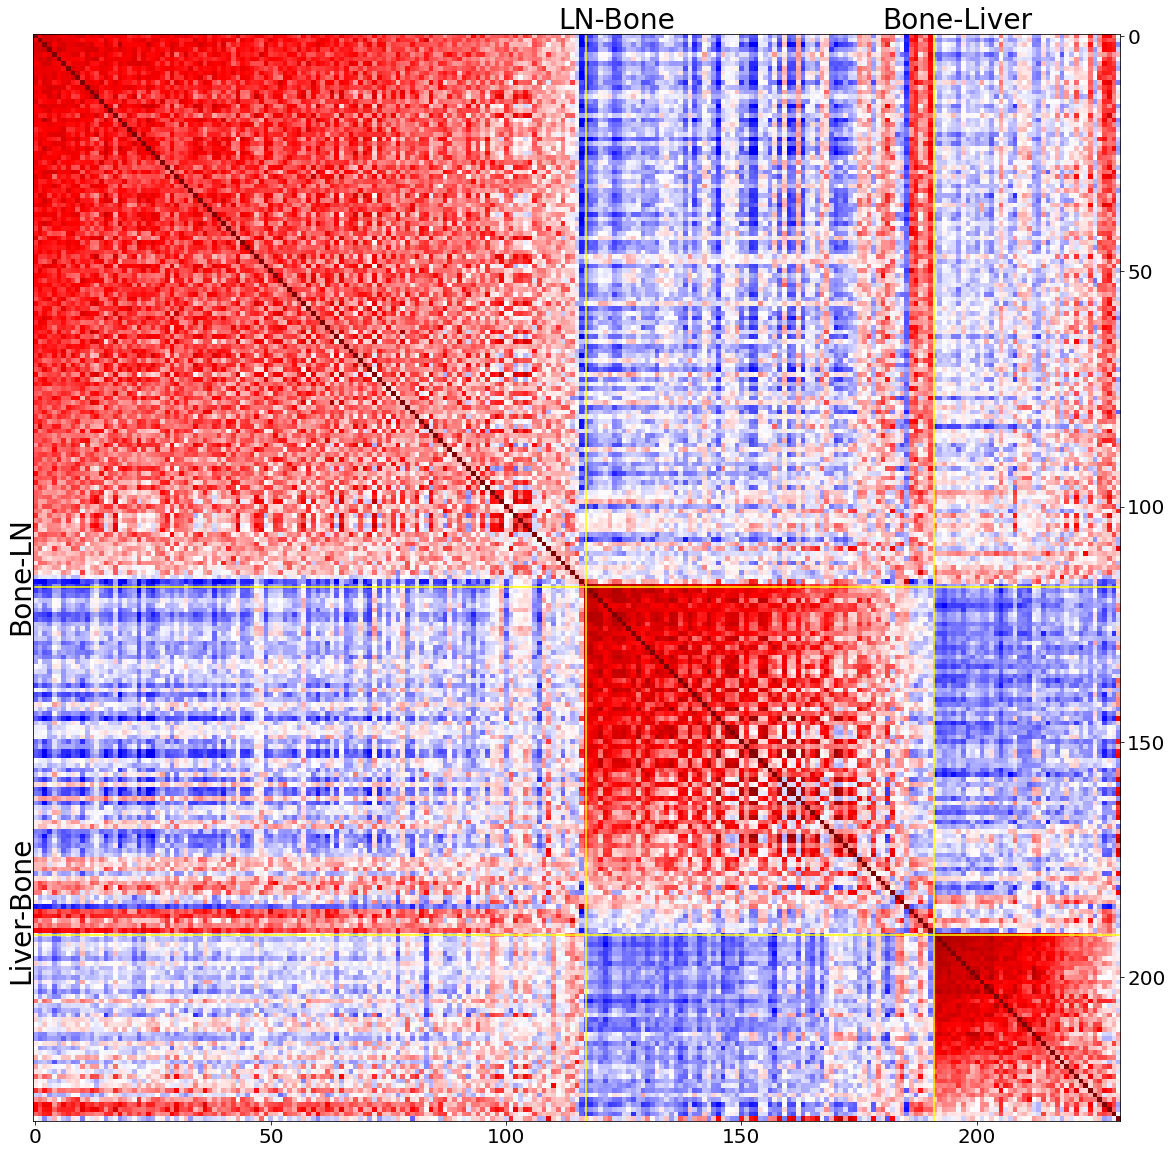

In [37]:
"""the above code plots union genes of three types and selected by both LN and Bone masks, but give opposite correlations.
    In this section, I will plot gene in 'three types' and also 'selected by both LN and Bone masks, 
    but give opposite correlations' give a name to it: intersect.
"""
# a (559, 231)  three types 0.15
# b (195, 231)   three types 0.20
# temp_genes[0] (2154, 231)  LN_Bone 0.15
# temp_genes[1] (1089, 231)  LN_Bone 0.20
# rres[0](2285, 231)  union 0.15
# rres[1] (1151, 231)  union 0.20
print(a.shape)
print(temp_genes[0].shape)
print(rres[0].shape)

print(b.shape)
print(temp_genes[1].shape)
print(rres[1].shape)

# for 0.15
difference_genes = []
intersect_genes = []
union_rres = set([tuple(x) for x in rres[0]])
three_types = set([tuple(x) for x in a])
LN_Bone = set([tuple(x) for x in temp_genes[0]])
intersect_three_LNBone = [tuple(x) for x in LN_Bone & three_types]
intersect_genes.append(np.array(intersect_three_LNBone))
print(len(intersect_three_LNBone))
intersect_three_LNBone = set(intersect_three_LNBone)
# difference_genes_temp = np.array([x for x in union_rres-intersect_three_LNBone])  
# difference_genes.append(difference_genes_temp)
# print(difference_genes_temp.shape)


# for 0.20
union_rres = set([tuple(x) for x in rres[1]])
three_types = set([tuple(x) for x in b])
LN_Bone = set([tuple(x) for x in temp_genes[1]])
intersect_three_LNBone = [tuple(x) for x in LN_Bone & three_types]
intersect_genes.append(np.array(intersect_three_LNBone))
print(len(intersect_three_LNBone))
intersect_three_LNBone=set(intersect_three_LNBone)

# difference_genes_temp = np.array([x for x in union_rres-intersect_three_LNBone]) 
# difference_genes.append(difference_genes_temp)
# print(difference_genes_temp.shape)


plot_genes = np.array(intersect_genes)


sorts = {"":'0',
    "homo":'1',
    "hetero":"2"}

norms = {'': '0',
         'linear_scale_and_bin': 'A',
         'log_scale_and_bin': 'A',
         'rank_and_scale': 'B'
}

params = ['homo','mean', '', sorts, norms] # scheme = {'', 'hetero' 'homo'}, norm = {'','rank_and_scale', 'scale_and_bin_linear', 'log_scale_and_bin'}

print(plot_genes.shape)
for i in range(len(plot_genes)):
    patient_np = plot_genes[i].T
#     patient_np = plot_genes[i,3].T   # uncomment this for intersect_genes only

    correlation_matrix, patient_np = norm_and_sort_patients(patient_np, params)#hetero homo scale_and_bin rank_and_scale


    plot_heatmap(correlation_matrix,params)

    

In [5]:
"""
given mask, top_n, norm scheme,
returns np.array(mask_corr) correlations of all genes with the mask, 
        np.array(good_mRNA) selected mRNAs shape: (n*231), 
        the_corr correlations of selected mRNAs with the mask
"""
def correlation_with_mask_top_n(mask, top_n, norm):
    (p_start, p_end) = (0,231)
    mRNA_231_df=pd.read_csv(mRNA_231_file)
    mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
    patient_mRNA = []
    for column in mRNA_231_df:
        #     print(mRNA_244_df[column].tolist())
        patient_mRNA.append(mRNA_231_df[column].tolist())
    mRNA_np = np.asarray(patient_mRNA)
    
    if norm == 'linear_scale_and_bin':
        mRNA_np = np.floor(scale(mRNA_np, 0, 100))
        
    if norm == 'log_scale_and_bin':
        mRNA_np = np.log10(mRNA_np+0.0000001)
        mRNA_np = np.floor(scale(mRNA_np, 0, 100))
        
    if norm == 'rank_and_scale': 
        x = mRNA_np.T
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        mRNA_np = scale(x.T,0,100)
    
    if norm == 'logit_origin': #logit-normalisation on the original binned values 
        mRNA_np =scale(np.floor(scale(mRNA_np, 0, 100)), 0.00000001,0.999999999) 
        mRNA_np = logit(mRNA_np)
        
    if norm == 'logit_log': #logit-normalisation on the log binned values 
        mRNA_np = np.log10(mRNA_np+0.0000001)
        mRNA_np =scale(np.floor(scale(mRNA_np, 0, 100)), 0.00000001,0.999999999) 
        mRNA_np = logit(mRNA_np)
        
        
        
    mRNA_np = mRNA_np.T
    
    mask_corr = []  # correlations of all genes with the mask
    good_mRNA = []  # selected mRNAs shape: (n*231)
    the_corr = []   # correlations of selected mRNAs with the mask
    abs_corr = []
    for i in range(len(mRNA_np)):
        each = mRNA_np[i]
        corr = np.corrcoef(mask, each)[1,0]
        if len(the_corr) < top_n:
            good_mRNA.append(each)
            the_corr.append(corr)
            abs_corr.append(abs(corr))
        else:
            if abs(corr) > min(abs_corr):
                ind = abs_corr.index(min(abs_corr))
                good_mRNA[ind]=each
                the_corr[ind]=corr
                abs_corr[ind]=abs(corr)
                
                
        mask_corr.append(corr)
    return np.array(mask_corr), np.array(good_mRNA), the_corr



def gene_selected_by_top_n(norm,top_n ):
    '''
    returns union_genes, intersect_genes
    '''
    LN_m = [1]*117+(231-117)*[0]
    Bone_m = [0]*117+74*[1]+(40)*[0]
    Liver_m = [0]*191+(40)*[1]
    
    LN_genes = []
    Bone_genes= []
    Liver_genes= []
    
    LN_corr = []
    Bone_corr= []
    Liver_corr= []
    
    correlations,_, LNgood_mRNA, the_corr = correlation_with_mask_top_n(LN_m, top_n,norm)
#     print(the_corr)
    LN_genes=LNgood_mRNA
    LN_corr = the_corr
    
    correlations, _,Bonegood_mRNA, the_corr = correlation_with_mask_top_n(Bone_m, top_n,norm)
    Bone_genes=Bonegood_mRNA
    Bone_corr= the_corr
    
    
    correlations,_, Livergood_mRNA, the_corr = correlation_with_mask_top_n(Liver_m, top_n,norm)
    Liver_genes=Livergood_mRNA
    Liver_corr= the_corr
    
    allgood_mRNA = np.concatenate((LN_genes,Bone_genes,Liver_genes), axis=0) 
    allgood_mRNA = np.unique(allgood_mRNA, axis=0)
#         print(allgood_mRNA.shape)
    return np.array([allgood_mRNA])


def table_of_selected_intersect(intersect_genes):
    """
    print the table shows intersect number of genes under masks, column 1-4: LN ∩ Bone
    Bone ∩ Liver, Liver ∩ LN , LN ∩ Liver ∩ LN 
    """
    intersect_num_list = []
    for each in intersect_genes:
        temp = []
        for a in each:
            temp.append(len(a))
        intersect_num_list.append(temp)
    res_table = pd.DataFrame(intersect_num_list)
    return res_table

(2, 4)
(559, 231)
(195, 231)
(2,)
(2154, 231)
(1089, 231)
(559, 231)
(195, 231)
(2285, 231)
(1151, 231)
(2,)


3237
2324
(2, 4)
num of genes selected
559
num of genes selected
195
table_of_selected_intersect
      0     1     2    3
0  2285  1391  1997  559
1  1151   605   955  195
131
62
(2,)
(428, 231)


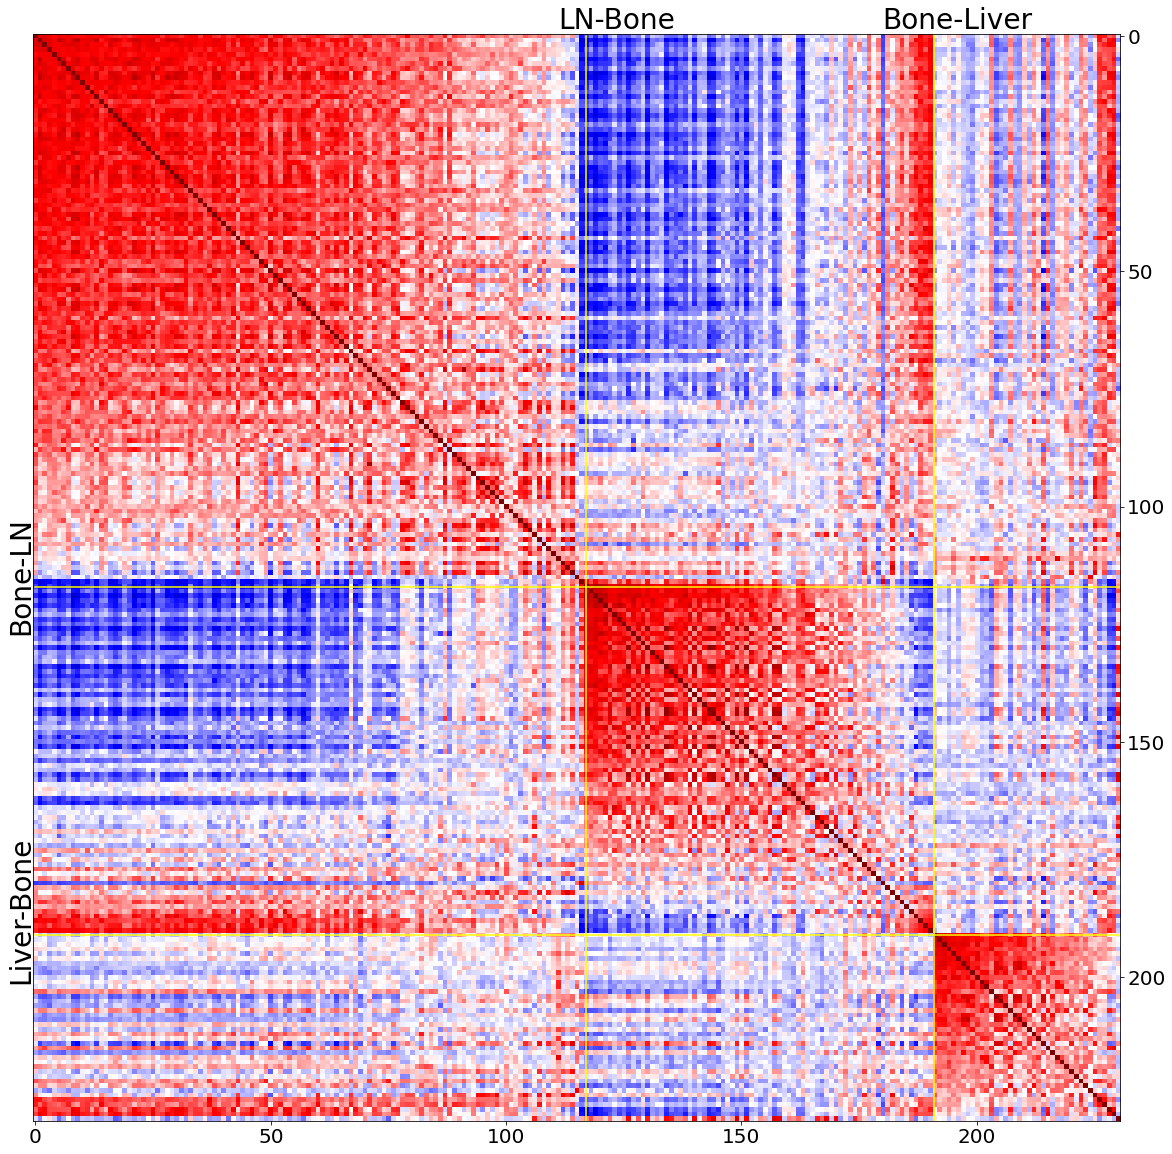

(133, 231)


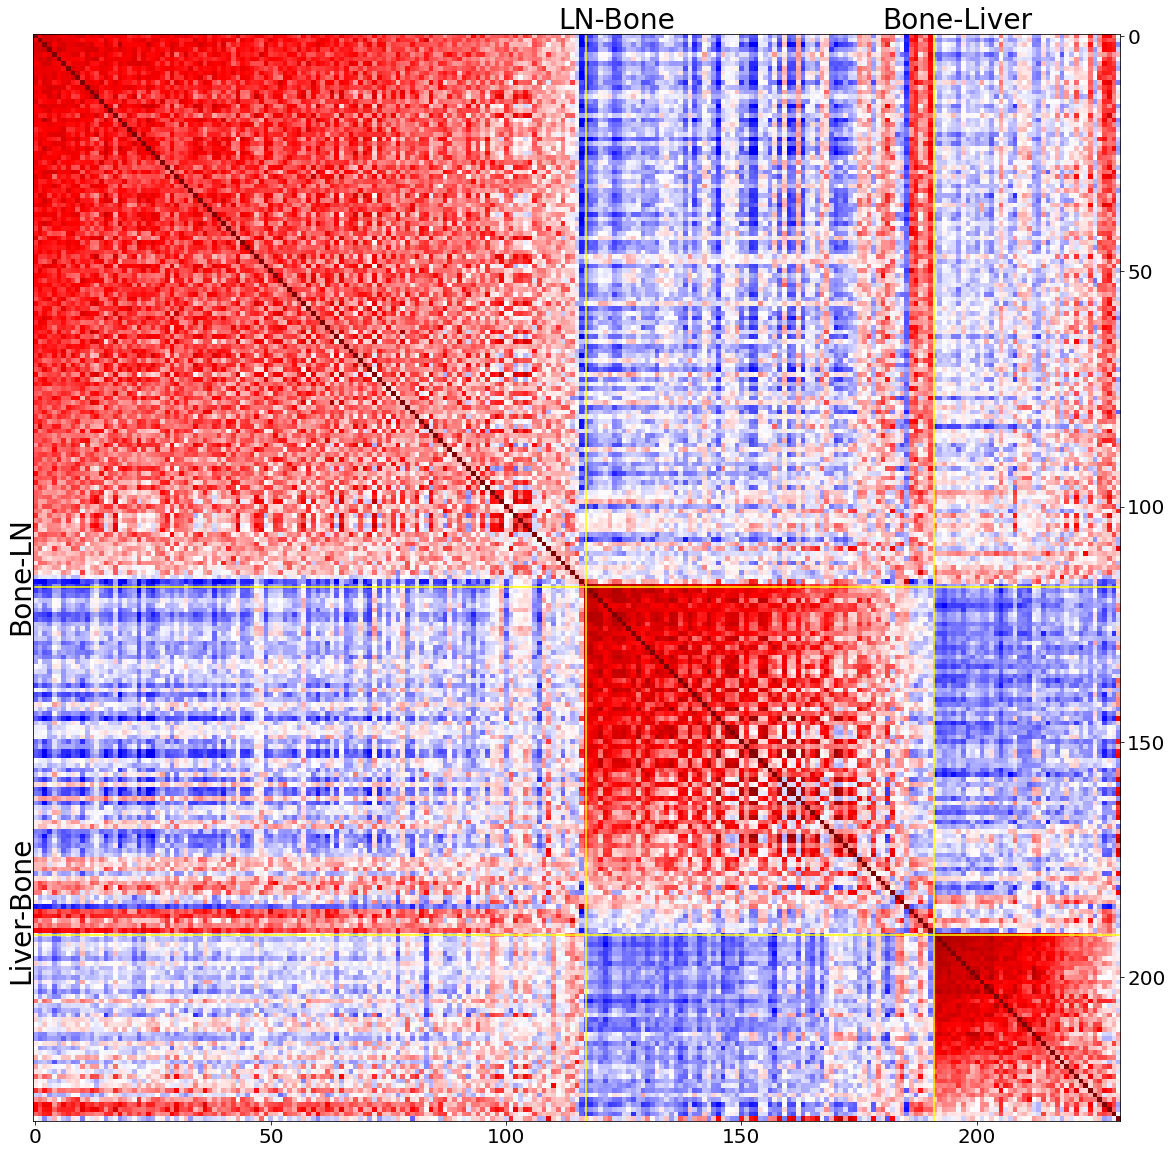

In [46]:
norm = "rank_and_scale" # linear_scale_and_bin, log_scale_and_bin, rank_and_scale, logit_origin, logit_log
# union_genes = gene_selected_by_top_n(norm, 100) #union_genes,intersect_genes = gene_selected_by_diff_threshold(norm, thresholds)


thresholds = np.arange(0.15, 0.25, 0.05)
res_genes = []

union_genes,intersect_genes, difference_genes= gene_selected_by_diff_threshold(norm, thresholds, remove_intersect=True)

plot_genes = intersect_genes
print(np.array(plot_genes).shape)
for i in range(len(plot_genes)):
    print("num of genes selected")
    print(np.array(plot_genes)[i,3].shape[0])
res_table = table_of_selected_intersect(intersect_genes)

print("table_of_selected_intersect")
print(res_table)

for i in range(len(intersect_genes)):
    temp = intersect_genes[i,3]
    ggs = []
    for each in temp:
        LNcorr = np.corrcoef(LN_m, each)[1,0]
        Bonecorr = np.corrcoef(Bone_m, each)[1,0]
        Livercorr = np.corrcoef(Liver_m, each)[1,0]
        if LNcorr>0 and Bonecorr>0 :
            ggs.append(each)
        if LNcorr<0 and Bonecorr<0 :
            ggs.append(each)
    print(len(ggs))
    intersect_temp = set([tuple(x) for x in temp])
    all_same_signs = set([tuple(x) for x in ggs])
    rr = [tuple(x) for x in intersect_temp - all_same_signs]
    res_genes.append(np.array(rr))  # the genes in both LN and Bone, but opposite
        
plot_genes = np.array(res_genes)
sorts = {"":'0',
    "homo":'1',
    "hetero":"2"}

norms = {'': '0',
         'linear_scale_and_bin': 'A',
         'log_scale_and_bin': 'A',
         'rank_and_scale': 'B'
}

params = ['homo','mean', '', sorts, norms] # scheme = {'', 'hetero' 'homo'}, norm = {'','rank_and_scale', 'scale_and_bin_linear', 'log_scale_and_bin'}

print(plot_genes.shape)
for i in range(len(plot_genes)):
    patient_np = plot_genes[i].T
#     patient_np = plot_genes[i,3].T   # uncomment this for intersect_genes only
    print(plot_genes[i].shape)
    correlation_matrix, patient_np = norm_and_sort_patients(patient_np, params)#hetero homo scale_and_bin rank_and_scale


    plot_heatmap(correlation_matrix,params)


0.15
0.2


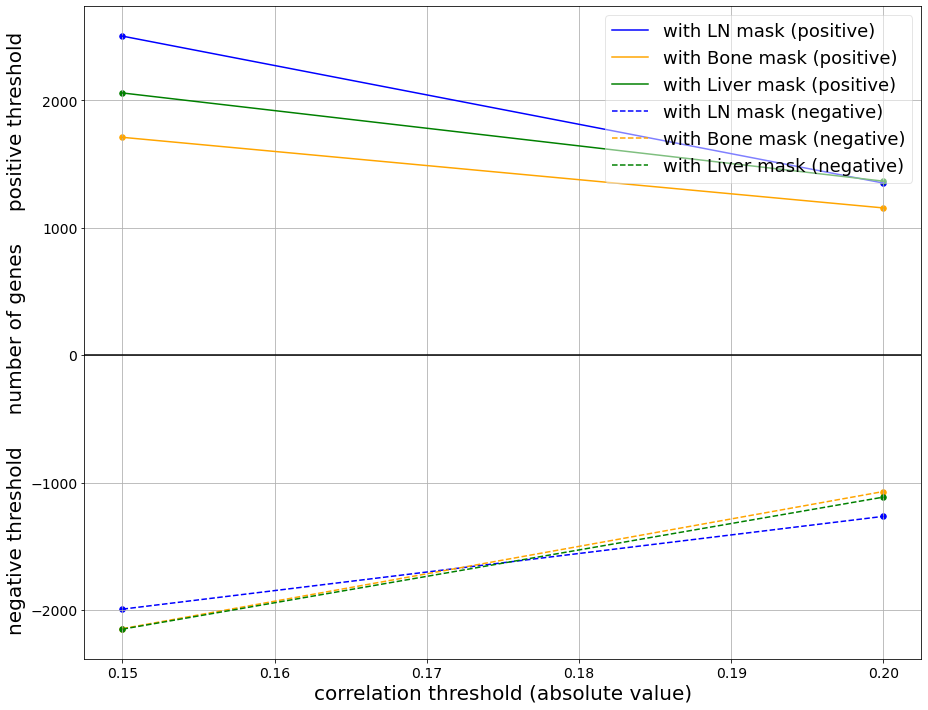

threshold_select_num_df
     LN  LN p  LN n  Bone  Bone p  Bone n  Liver  Liver p  Liver n
0  4496  2504  1992  3855    1710    2145   4207     2058     2149
1  2615  1351  1264  2225    1156    1069   2479     1366     1113
(2,)
(7444, 231)
(4803, 231)


C:\Users\bird\Anaconda3\lib\site-packages\ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [43]:
# thresholds = np.arange(0.05, 0.5, 0.05)
thresholds = np.arange(0.15, 0.2, 0.05)
# thresholds = 0.15
norm = "rank_and_scale" # linear_scale_and_bin, log_scale_and_bin, rank_and_scale, logit_origin, logit_log
threshold_select_num_df = plot_diff_threshold(norm, thresholds)
print("threshold_select_num_df")
print(threshold_select_num_df)

print("==============================================")
union_genes,intersect_genes,inds = gene_selected_by_diff_threshold(norm, thresholds,remove_intersect= False)

print(np.array(union_genes).shape)
for i in range(len(union_genes)):
    print(np.array(union_genes)[i].shape)
    
# intersect_table = table_of_selected_intersect(intersect_genes)

# print("table_of_selected_intersect")
# print(intersect_table)



In [44]:
# cores=np.array(intersect_genes[0][3]).shape 
# # intersect_genes
# temp_df = pd.DataFrame(cores)
# temp_df
# temp_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\patient_net_features.csv")
len(inds[1])

4803

In [46]:
# df.ix[ind_list]
mRNA_231_df=pd.read_csv(mRNA_231_file)


mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
temp_df=mRNA_231_df.iloc[inds[1],:]
temp_df
temp_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\union_genes_4803.csv")

In [60]:
'''
Plot: X as all genes and Y as 3 correlation values with each of the three masks in different colours. 
You can sort the genes according to the correlation value with the LN mask. 
Then another plot where you sort the genes according to the correlation value with the Bone mask.
Then another plot where you sort the genes according to the correlation value with the Liver mask.

parameter 'norm' is normalisation scheme. '' is use original data, 'rank_and_scale' is use rank_and_scale 
on data, and then do mask correlation. 
'''

def plot_each_gene_correlation_with_each_mask(norm):
    (p_start, p_end) = (0,231)
    mRNA_231_df=pd.read_csv(mRNA_231_file)
    mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
    patient_mRNA = []
    for column in mRNA_231_df:
        #     print(mRNA_244_df[column].tolist())
        patient_mRNA.append(mRNA_231_df[column].tolist())
    mRNA_np = np.asarray(patient_mRNA)
   
    if norm == 'rank_and_scale': 
        x = mRNA_np.T
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        mRNA_np = scale(x.T,0,100)
        
        
    mRNA_np = mRNA_np.T
    
    print(len(mRNA_np))
    LN_c = []
    Bone_c = []
    Liver_c = []
    LN_m = [1]*117+(231-117)*[0]
    Bone_m = [0]*117+74*[1]+(40)*[0]
    Liver_m = [0]*191+(40)*[1]
    orders_list = [] #3d list (3, 14379), stores order of indexs sorted by Ln,Bone and Liver
    
    
    for i in range(len(mRNA_np)):
        each = mRNA_np[i]
        corr = np.corrcoef(LN_m, each)[1,0]
        LN_c.append(corr)
        corr = np.corrcoef(Bone_m, each)[1,0]
        Bone_c.append(corr)
        corr = np.corrcoef(Liver_m, each)[1,0]
        Liver_c.append(corr)
#         mask_corr.append(corr)
    indexs = np.arange(len(mRNA_np))
    masks_corr_df = pd.DataFrame({"ind": indexs, "LN": LN_c, "Bone": Bone_c, "Liver":Liver_c})
    masks_corr_df = masks_corr_df.sort_values(['LN'], ascending=[False])
    LN_sort = masks_corr_df['LN'].to_numpy()
    Bone_sort = masks_corr_df['Bone'].to_numpy()
    Liver_sort = masks_corr_df['Liver'].to_numpy()
    orders_list.append(masks_corr_df['ind'].to_numpy())
    
    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_sort))), LN_sort, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Bone_sort, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Liver_sort, label='with Liver mask',s=1)
    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.show()


    masks_corr_df = masks_corr_df.sort_values(['Bone'], ascending=[False])
    LN_sort = masks_corr_df['LN'].to_numpy()
    Bone_sort = masks_corr_df['Bone'].to_numpy()
    Liver_sort = masks_corr_df['Liver'].to_numpy()
    orders_list.append(masks_corr_df['ind'].to_numpy())

    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_sort))), LN_sort, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Bone_sort, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Liver_sort, label='with Liver mask',s=1)
    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.show()

    masks_corr_df = masks_corr_df.sort_values(['Liver'], ascending=[False])
    LN_sort = masks_corr_df['LN'].to_numpy()
    Bone_sort = masks_corr_df['Bone'].to_numpy()
    Liver_sort = masks_corr_df['Liver'].to_numpy()
    orders_list.append(masks_corr_df['ind'].to_numpy())

    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_sort))), LN_sort, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Bone_sort, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Liver_sort, label='with Liver mask',s=1)
    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.show()
    return orders_list


def plot_correlation_with_each_mask_with_a_defind_order(norm, orders_list):
#     print(orders_list)
    (p_start, p_end) = (0,231)
    mRNA_231_df=pd.read_csv(mRNA_231_file)
    mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
    patient_mRNA = []
    for column in mRNA_231_df:
        #     print(mRNA_244_df[column].tolist())
        patient_mRNA.append(mRNA_231_df[column].tolist())
    mRNA_np = np.asarray(patient_mRNA)
   
    if norm == 'rank_and_scale': 
        x = mRNA_np.T
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        mRNA_np = scale(x.T,0,100)
        
        
    mRNA_np = mRNA_np.T
    
    print(len(mRNA_np))
    LN_c = []
    Bone_c = []
    Liver_c = []
    LN_m = [1]*117+(231-117)*[0]
    Bone_m = [0]*117+74*[1]+(40)*[0]
    Liver_m = [0]*191+(40)*[1]
    
    for i in orders_list[0]:
        each = mRNA_np[i]
        corr = np.corrcoef(LN_m, each)[1,0]
        LN_c.append(corr)
        corr = np.corrcoef(Bone_m, each)[1,0]
        Bone_c.append(corr)
        corr = np.corrcoef(Liver_m, each)[1,0]
        Liver_c.append(corr)
#         mask_corr.append(corr)
    
    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_c))), LN_c, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_c))),Bone_c, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_c))),Liver_c, label='with Liver mask',s=1)
    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.show()

    
    LN_c = []
    Bone_c = []
    Liver_c = []

    for i in orders_list[1]:
        each = mRNA_np[i]
        corr = np.corrcoef(LN_m, each)[1,0]
        LN_c.append(corr)
        corr = np.corrcoef(Bone_m, each)[1,0]
        Bone_c.append(corr)
        corr = np.corrcoef(Liver_m, each)[1,0]
        Liver_c.append(corr)
#         mask_corr.append(corr)
    
    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_c))), LN_c, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_c))),Bone_c, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_c))),Liver_c, label='with Liver mask',s=1)
    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.show()
    
    
    
    LN_c = []
    Bone_c = []
    Liver_c = []
    
    for i in orders_list[2]:
        each = mRNA_np[i]
        corr = np.corrcoef(LN_m, each)[1,0]
        LN_c.append(corr)
        corr = np.corrcoef(Bone_m, each)[1,0]
        Bone_c.append(corr)
        corr = np.corrcoef(Liver_m, each)[1,0]
        Liver_c.append(corr)
#         mask_corr.append(corr)
    
    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_c))), LN_c, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_c))),Bone_c, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_c))),Liver_c, label='with Liver mask',s=1)
    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.show()
    
    


14379


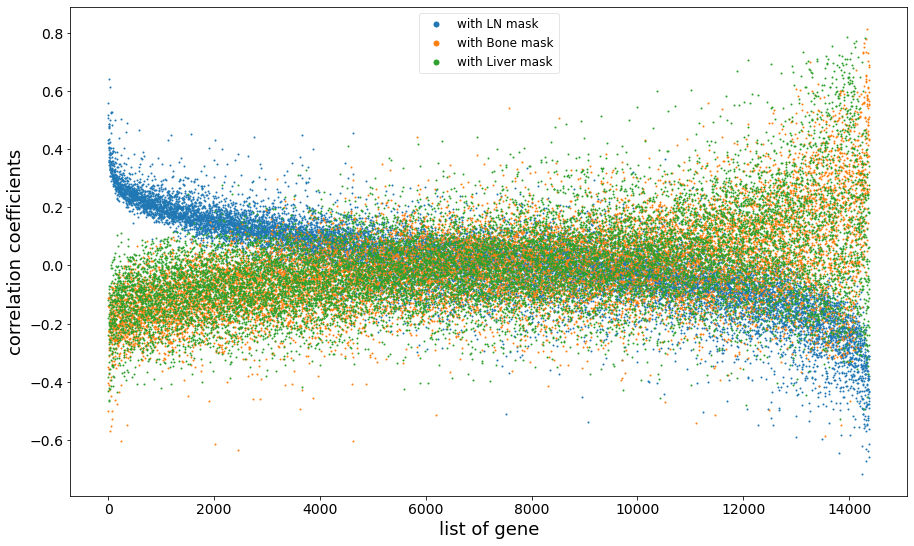

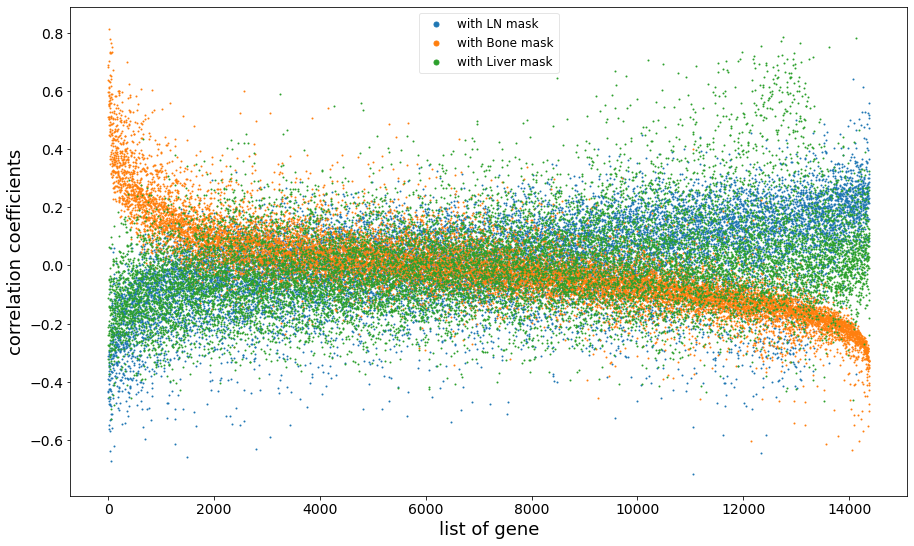

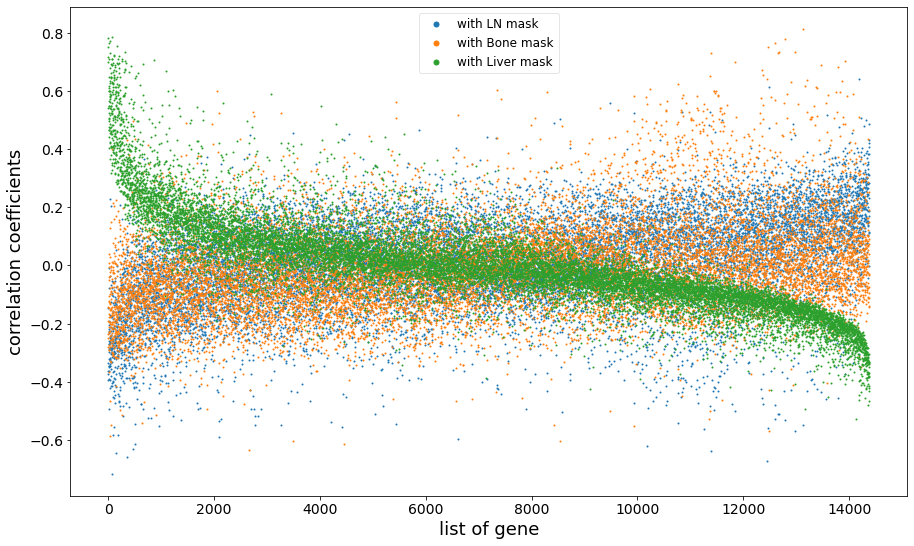

In [62]:
norm = "rank_and_scale"
# orders_list = plot_each_gene_correlation_with_each_mask(norm)
# print(orders_list)
plot_correlation_with_each_mask_with_a_defind_order(norm, orders_list)


(231, 14379)
14379
(14379, 100)


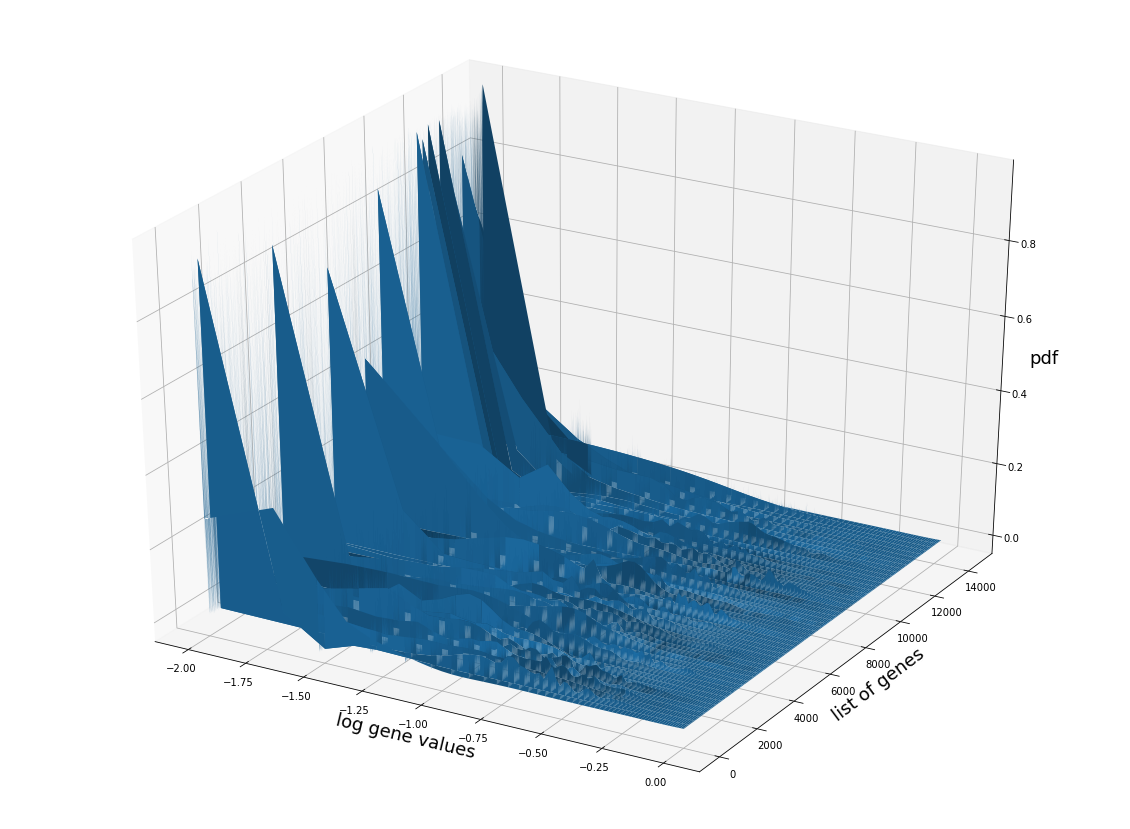

In [24]:
'''
in this section, we plot a 3d map to visualise the gene value distribution among patients.
'''


def linear_scale_genes(patient):
    patient_np = np.copy(patient)
    patient_np = np.floor(scale(patient_np, 0, 100))
    patient_np = np.multiply(patient_np, 0.01)+0.001
    gene_values = patient_np.flatten()
    gene_values.sort()
    return gene_values


"""plot a 3d map to visualise the gene value distribution among patients.
   patient_np, norm = 'range' or 'log'
"""
def plot_normed_3d_gene_value_distr(patient_np, norm):

    ll = [] # length of 14379, shape: 14379,231. for each row, 231 values are normed into [0,1]
    for i in range(14379):
        genes_np =np.copy(patient_np[:,i:i+1])
        normed = None
        if norm == 'linear_scale_and_bin':
            normed = linear_scale_genes(genes_np)
        if norm == 'scale_bin_then_log':
            normed = np.log10(linear_scale_genes(genes_np))
            normed = linear_scale_genes(genes_np)
        else:
            
            normed = genes_np + 0.0000001
        ll.append(normed)

    print(len(ll))

    values = []  # values shape (14379, 100) each gene's 231 values are bined into 100 parts
    for each_row in ll:
        n = 100
        normed_val = np.copy(each_row)
        normed_val = normed_val.flatten()

        s = np.asarray(normed_val)   # generate your data sample with N elements
        p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
        x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
        f = UnivariateSpline(x, p, s=n)
        y = f(x)/len(normed_val)
        values.append(y)
    values = np.array(values)
    print(values.shape)

    %matplotlib inline

    x = np.log10(np.arange(0.01,1.01,0.01))
#     x = np.arange(0,1,0.01)
    y = np.arange(0,14379,1)
    X,Y = np.meshgrid(x,y)

    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(111, projection='3d')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
#     plt.xscale('log')#///
#     ax.xaxis._set_scale('log')
#     ax.xaxis.set_scale('log')
    ax.set_xlabel('log gene values', size =18)
    ax.set_ylabel('list of genes', size = 18)
    ax.set_zlabel('pdf', size = 18)
    # Plot a 3D surface
    ax.plot_surface(X, Y, values)

    plt.show()
    
    
    
# prepare patient_np (231, 14379)
mRNA_231_df=pd.read_csv(mRNA_231_file)

mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
patient_mRNA = []
for column in mRNA_231_df:
    patient_mRNA.append(mRNA_231_df[column].tolist())

patient_np = np.asarray(patient_mRNA) 
print(patient_np.shape)

norm = 'linear_scale_and_bin' # norm = 'linear_scale_and_bin' or 'log_scale_and_bin'
plot_normed_3d_gene_value_distr(patient_np, norm)


In [16]:
x = np.arange(0.001,1.001,0.01)
x = np.log10(x)
x

array([-3.        , -1.95860731, -1.67778071, -1.50863831, -1.38721614,
       -1.29242982, -1.21467016, -1.14874165, -1.09151498, -1.04095861,
       -0.99567863, -0.95467702, -0.91721463, -0.8827287 , -0.85078089,
       -0.82102305, -0.79317412, -0.76700389, -0.74232143, -0.71896663,
       -0.69680394, -0.67571754, -0.65560773, -0.63638802, -0.61798296,
       -0.60032628, -0.58335949, -0.56703071, -0.55129368, -0.53610701,
       -0.5214335 , -0.50723961, -0.49349497, -0.48017201, -0.46724562,
       -0.45469288, -0.4424928 , -0.43062609, -0.41907502, -0.40782324,
       -0.39685563, -0.38615818, -0.3757179 , -0.36552273, -0.35556141,
       -0.34582346, -0.33629907, -0.32697909, -0.31785492, -0.30891851,
       -0.30016227, -0.2915791 , -0.28316228, -0.27490548, -0.26680273,
       -0.2588484 , -0.25103714, -0.24336389, -0.23582387, -0.22841252,
       -0.22112553, -0.21395879, -0.2069084 , -0.19997064, -0.19314197,
       -0.18641901, -0.17979854, -0.17327748, -0.16685289, -0.16

In [15]:
"""
some initail reseach, ignore
"""
    

def linear_scale_genes(patient):
    patient_np = np.copy(patient)
    patient_np = scale(patient_np, 0.001, 0.999)    

    gene_values = patient_np.flatten()
    gene_values.sort()
    return gene_values


mRNA_231_df=pd.read_csv(mRNA_231_file)

mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
patient_mRNA = []
for column in mRNA_231_df:
    patient_mRNA.append(mRNA_231_df[column].tolist())

patient_np = np.asarray(patient_mRNA)
# print(patient_np)
gene_values = linear_scale_genes(patient_np)
plot_general_distr(gene_values, 'gene value')


    
randlist =[0]+random.sample(range(0, 14379), 5)
randlist.sort()
print(randlist)
ll = []
for i in randlist:
    genes_np =np.copy(patient_np[:,i:i+1])
    ll.append(linear_scale_genes(genes_np))


plt.figure(figsize=(10,5))
plt.xlabel('gene value distribution for selection of genes', fontsize=20)
plt.ylabel('pdf', fontsize=20)
ind = 1
for correlation_matrix in ll:
    n = 500
    if len(correlation_matrix.shape) == 2 and correlation_matrix.shape[0] == correlation_matrix.shape[1]:
        correlations = correlation_matrix[~np.eye(correlation_matrix.shape[0],dtype=bool)].reshape(correlation_matrix.shape[0],-1)
    else:
        n = 100
        correlations = np.copy(correlation_matrix)
    print(correlations.shape)               
    correlations = correlations.flatten()
    #     correlations = [ round(elem, 3) for elem in correlations ]


    # print(len(correlations))
    # correlations = list(filter(lambda a: a <0.9999, correlations))
    # print(len(correlations))

    s = np.asarray(correlations)   # generate your data sample with N elements
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    y = f(x)/len(correlations)

    plt.plot(x, y, label = 'gene '+str(ind))
    ind+=1
plt.legend(loc='upper right',  markerscale=5,fontsize=16)
# plt.yscale('log')
plt.show()




array([[2, 3, 4],
       [3, 4, 5]])